### 1. Preparación del entorno de trabajo y carga de datos

In [1]:
#importación de las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
from math import e
import os
from dateutil.parser import parse
import re
import warnings
from mysql.connector import Error
import matplotlib.pyplot as plt
from random import sample
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d.axes3d import Axes3D
import string
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import plotly.graph_objects as go

In [2]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly --upgrade


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install geopandas folium

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: geopandas in c:\users\pc\appdata\local\programs\python\python311\lib\site-packages (1.0.1)




[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv(r'C:\Users\pc\Desktop\bootcamp\data_p1.csv') #importamos el .csv para tener el data frame instalado para trabajar con él.

### 2.Inspección Inicial Datos

In [6]:
df_head = df.head()
df_info = df.info()
df_head, df_info
print(df.head()) # visualizamos las 10 primeras líneas
print(df.tail()) # visualizamos las 10 ultimas líneas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

In [7]:
print("estadísticas descriptivas:")
print(df.describe()) 

estadísticas descriptivas:
             Budget         Spend   Impressions         Clicks          CTR  \
count  4.500000e+03  4.501000e+03  4.496000e+03    4514.000000  4502.000000   
mean   3.196766e+05  2.754637e+05  6.050865e+05   27467.000985     0.585820   
std    7.511176e+05  3.985757e+05  1.643209e+06   23203.538244     0.800421   
min    1.001400e+04  1.000000e+00  1.593000e+03     104.000000     0.000500   
25%    1.379872e+05  1.113680e+05  2.624278e+05   12713.750000     0.250425   
50%    2.659450e+05  2.292810e+05  5.089675e+05   26232.000000     0.500150   
75%    3.855895e+05  3.445920e+05  7.663295e+05   38618.250000     0.760400   
max    4.175610e+07  4.317430e+06  9.991660e+07  250409.021300     9.570650   

        Conversions           CR       Revenue          ROI     Duration  \
count   4506.000000  4504.000000  4.491000e+03  4505.000000  4521.000000   
mean    5591.891502     0.556345  5.962208e+05     2.816823   200.590123   
std     5629.011928     0.580404 

### 3. Limpieza de datos
Ahora vamos a buscar datos poco relevantes, como por ejemplo outliers y trabajaremos con ellos de manera pertinente con tal de hacer un análisis más exacto y eficiente. 
Buscaremos y eliminaremos los valores vacíos porque son innecesarios para el análisis así obtrendremos mejores resultados de manera más fácil.

In [8]:
print("¿Cúantos valores faltan por columna?")
df.isnull().sum()

¿Cúantos valores faltan por columna?


Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

In [9]:
print("¿dónde hay valores vacíos?")
df.isnull() #los true son valores vacios

¿dónde hay valores vacíos?


,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# reemplazamos los valores True  con NaN
df = df.replace(True, np.nan)

print("\nDataFrame después de reemplazar True por NaN:")
print(df)


DataFrame después de reemplazar True por NaN:
     Campaign_ID       Channel Product_Category        Region    Budget  \
0        CAM0001     Billboard          Fashion  Kuala Lumpur  484341.0   
1        CAM0002           NaN           Health       Sarawak  468792.0   
2        CAM0003         Radio      Electronics        Penang   10487.0   
3        CAM0004         Email      Electronics        Penang  345431.0   
4        CAM0005         Radio          Fashion  Kuala Lumpur  322345.0   
...          ...           ...              ...           ...       ...   
4995     CAM4996         Email       Automotive  Kuala Lumpur  373204.0   
4996     CAM4997         Radio      Electronics  Kuala Lumpur   81357.0   
4997     CAM4998         Radio              NaN  Kuala Lumpur  216060.0   
4998     CAM4999  Social Media      Electronics  Kuala Lumpur  120531.0   
4999     CAM5000            TV       Automotive         Sabah  476378.0   

         Spend  Impressions   Clicks     CTR  Conver

In [11]:
# mantenemos las filas que tengan almenos 5 datos completos
df = df.dropna(thresh=5) 
# ahora hacemos los mismo con las columnas
df = df.dropna(axis=1, thresh=5)


 Eliminamos las columnas "Campaign_ID", "Start_Date", "End_Date", "Revenue", "Impressions","Customer_Satisfaction","Campaign_Effectiveness","CTR" del DataFrame algunas por falta de datos por columna y otras por que las considero irrelevantes para hacer el análisis

In [12]:
df= df.drop(columns=["Campaign_ID", "Start_Date", "End_Date", "Impressions","Customer_Satisfaction","Campaign_Effectiveness","CTR"])

In [13]:
df_filtrado = df_filtrado.replace('unknown', pd.NA).dropna()
df_filtrado = df_filtrado.loc[:, (df_filtrado != 'unknown').all(axis=0)]
print(df_filtrado)

NameError: name 'df_filtrado' is not defined

Ahora para buscar los Outliers vamos a buscar los quartiles 1 y 3 además del rango intecuartílico. Visualmente ya hemos localizado algunos con los gráficos llamados anteriormente. Los buscaré por columnas individualmente como he hecho con los gráficos anteriores.

##### BUDGET

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df_filtrado['Budget'].quantile(0.25)
Q3 = df_filtrado['Budget'].quantile(0.75)
IQR = Q3 - Q1

# definimos los limites inferiores y superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# filtramos los outliers
df_filtrado = df_filtrado[(df_filtrado['Budget']>= limite_inferior)& (df_filtrado['Budget']<= limite_superior)]

##### SPEND

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df_filtrado['Spend'].quantile(0.25)
Q3 = df_filtrado['Spend'].quantile(0.75)
IQR = Q3 - Q1

# definimos los limites inferiores y superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# filtramos los outliers
df_filtrado = df_filtrado[(df['Spend']>= limite_inferior)& (df_filtrado['Spend']<= limite_superior)]


C:\Users\pc\AppData\Local\Temp\ipykernel_15244\2785083197.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_filtrado[(df['Spend']>= limite_inferior)& (df_filtrado['Spend']<= limite_superior)]


##### CONVERSIONS

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df_filtrado['Conversions'].quantile(0.25)
Q3 = df_filtrado['Conversions'].quantile(0.75)
IQR = Q3 - Q1

# definimos los limites inferiores y superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# filtramos los outliers
df_filtrado = df_filtrado[(df_filtrado['Conversions']>= limite_inferior)& (df_filtrado['Conversions']<= limite_superior)]


##### CR

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df_filtrado['CR'].quantile(0.25)
Q3 = df_filtrado['CR'].quantile(0.75)
IQR = Q3 - Q1

# definimos los limites inferiores y superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# filtramos los outliers
df_filtrado = df_filtrado[(df_filtrado['CR']>= limite_inferior)& (df_filtrado['CR']<= limite_superior)]



##### ROI

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df_filtrado['ROI'].quantile(0.25)
Q3 = df_filtrado['ROI'].quantile(0.75)
IQR = Q3 - Q1

# definimos los limites inferiores y superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# filtramos los outliers
df_filtrado = df_filtrado[(df_filtrado['ROI']>= limite_inferior)& (df_filtrado['ROI']<= limite_superior)]


##### DURATION

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df_filtrado['Duration'].quantile(0.25)
Q3 = df_filtrado['Duration'].quantile(0.75)
IQR = Q3 - Q1

# definimos los limites inferiores y superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# filtramos los outliers
df_filtrado = df_filtrado[(df_filtrado['Duration']>= limite_inferior)& (df_filtrado['Duration']<= limite_superior)]


##### CLICKS

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df_filtrado['Clicks'].quantile(0.25)
Q3 = df_filtrado['Clicks'].quantile(0.75)
IQR = Q3 - Q1

# definimos los limites inferiores y superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# filtramos los outliers
df_filtrado = df_filtrado[(df_filtrado['Clicks']>= limite_inferior)& (df_filtrado['Clicks']<= limite_superior)]



#### REVENUE

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df_filtrado['Revenue'].quantile(0.25)
Q3 = df_filtrado['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# definimos los limites inferiores y superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# filtramos los outliers
df_filtrado = df_filtrado[(df_filtrado['Revenue']>= limite_inferior)& (df_filtrado['Revenue']<= limite_superior)]



###  4.VISUALIZACIÓN DE DATOS

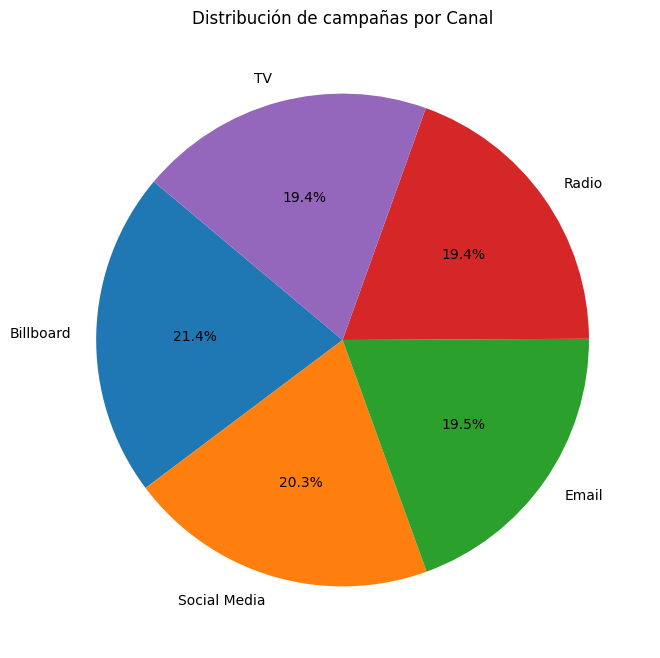

In [ ]:
# Agrupar por la columna 'Channel' y contar las ocurrencias para cada región
Channel_counts = df_filtrado['Channel'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Channel_counts, labels=Channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de campañas por Canal')
plt.show()

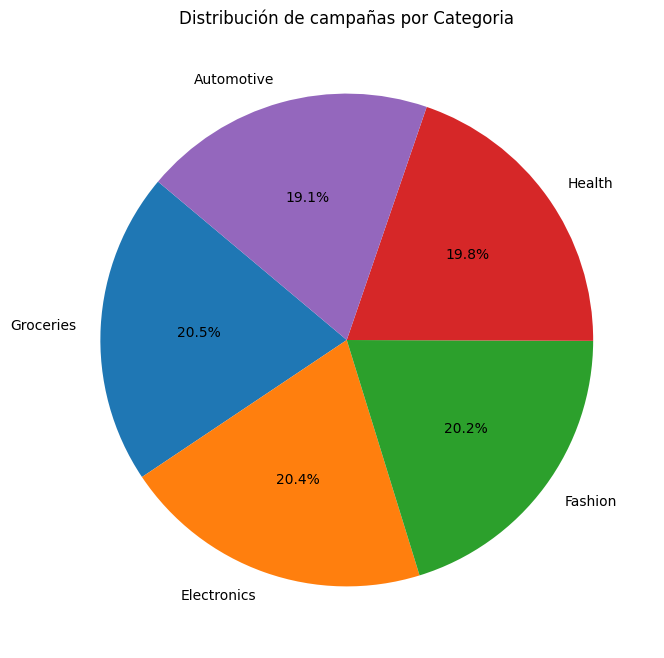

In [ ]:
# Agrupar por la columna 'Channel' y contar las ocurrencias para cada región
Category_counts = df_filtrado['Product_Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Category_counts, labels=Category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de campañas por Categoria')
plt.show()

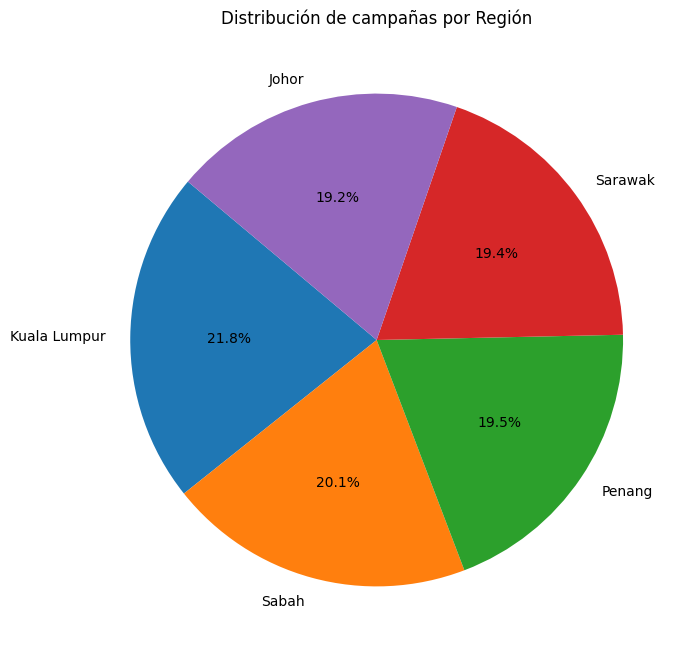

In [ ]:
# Agrupar por la columna 'Channel' y contar las ocurrencias para cada región
region_counts = df_filtrado['Region'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de campañas por Región')
plt.show()

In [ ]:
print(df_filtrado)

           Channel Product_Category        Region    Budget     Spend  \
2            Radio      Electronics        Penang   10487.0    6745.0   
3            Email      Electronics        Penang  345431.0  329112.0   
4            Radio          Fashion  Kuala Lumpur  322345.0   34365.0   
7        Billboard        Groceries           NaN  406954.0   64007.0   
9            Radio       Automotive           NaN  399568.0  297974.0   
...            ...              ...           ...       ...       ...   
4993         Email       Automotive        Penang  391536.0   46535.0   
4994            TV              NaN  Kuala Lumpur  330357.0  233849.0   
4996         Radio      Electronics  Kuala Lumpur   81357.0  381641.0   
4998  Social Media      Electronics  Kuala Lumpur  120531.0  433558.0   
4999            TV       Automotive         Sabah  476378.0  261529.0   

       Clicks  Conversions      CR   Revenue   ROI  Duration Market_Segment  
2     12209.0       7168.0  0.0517   51142.0 

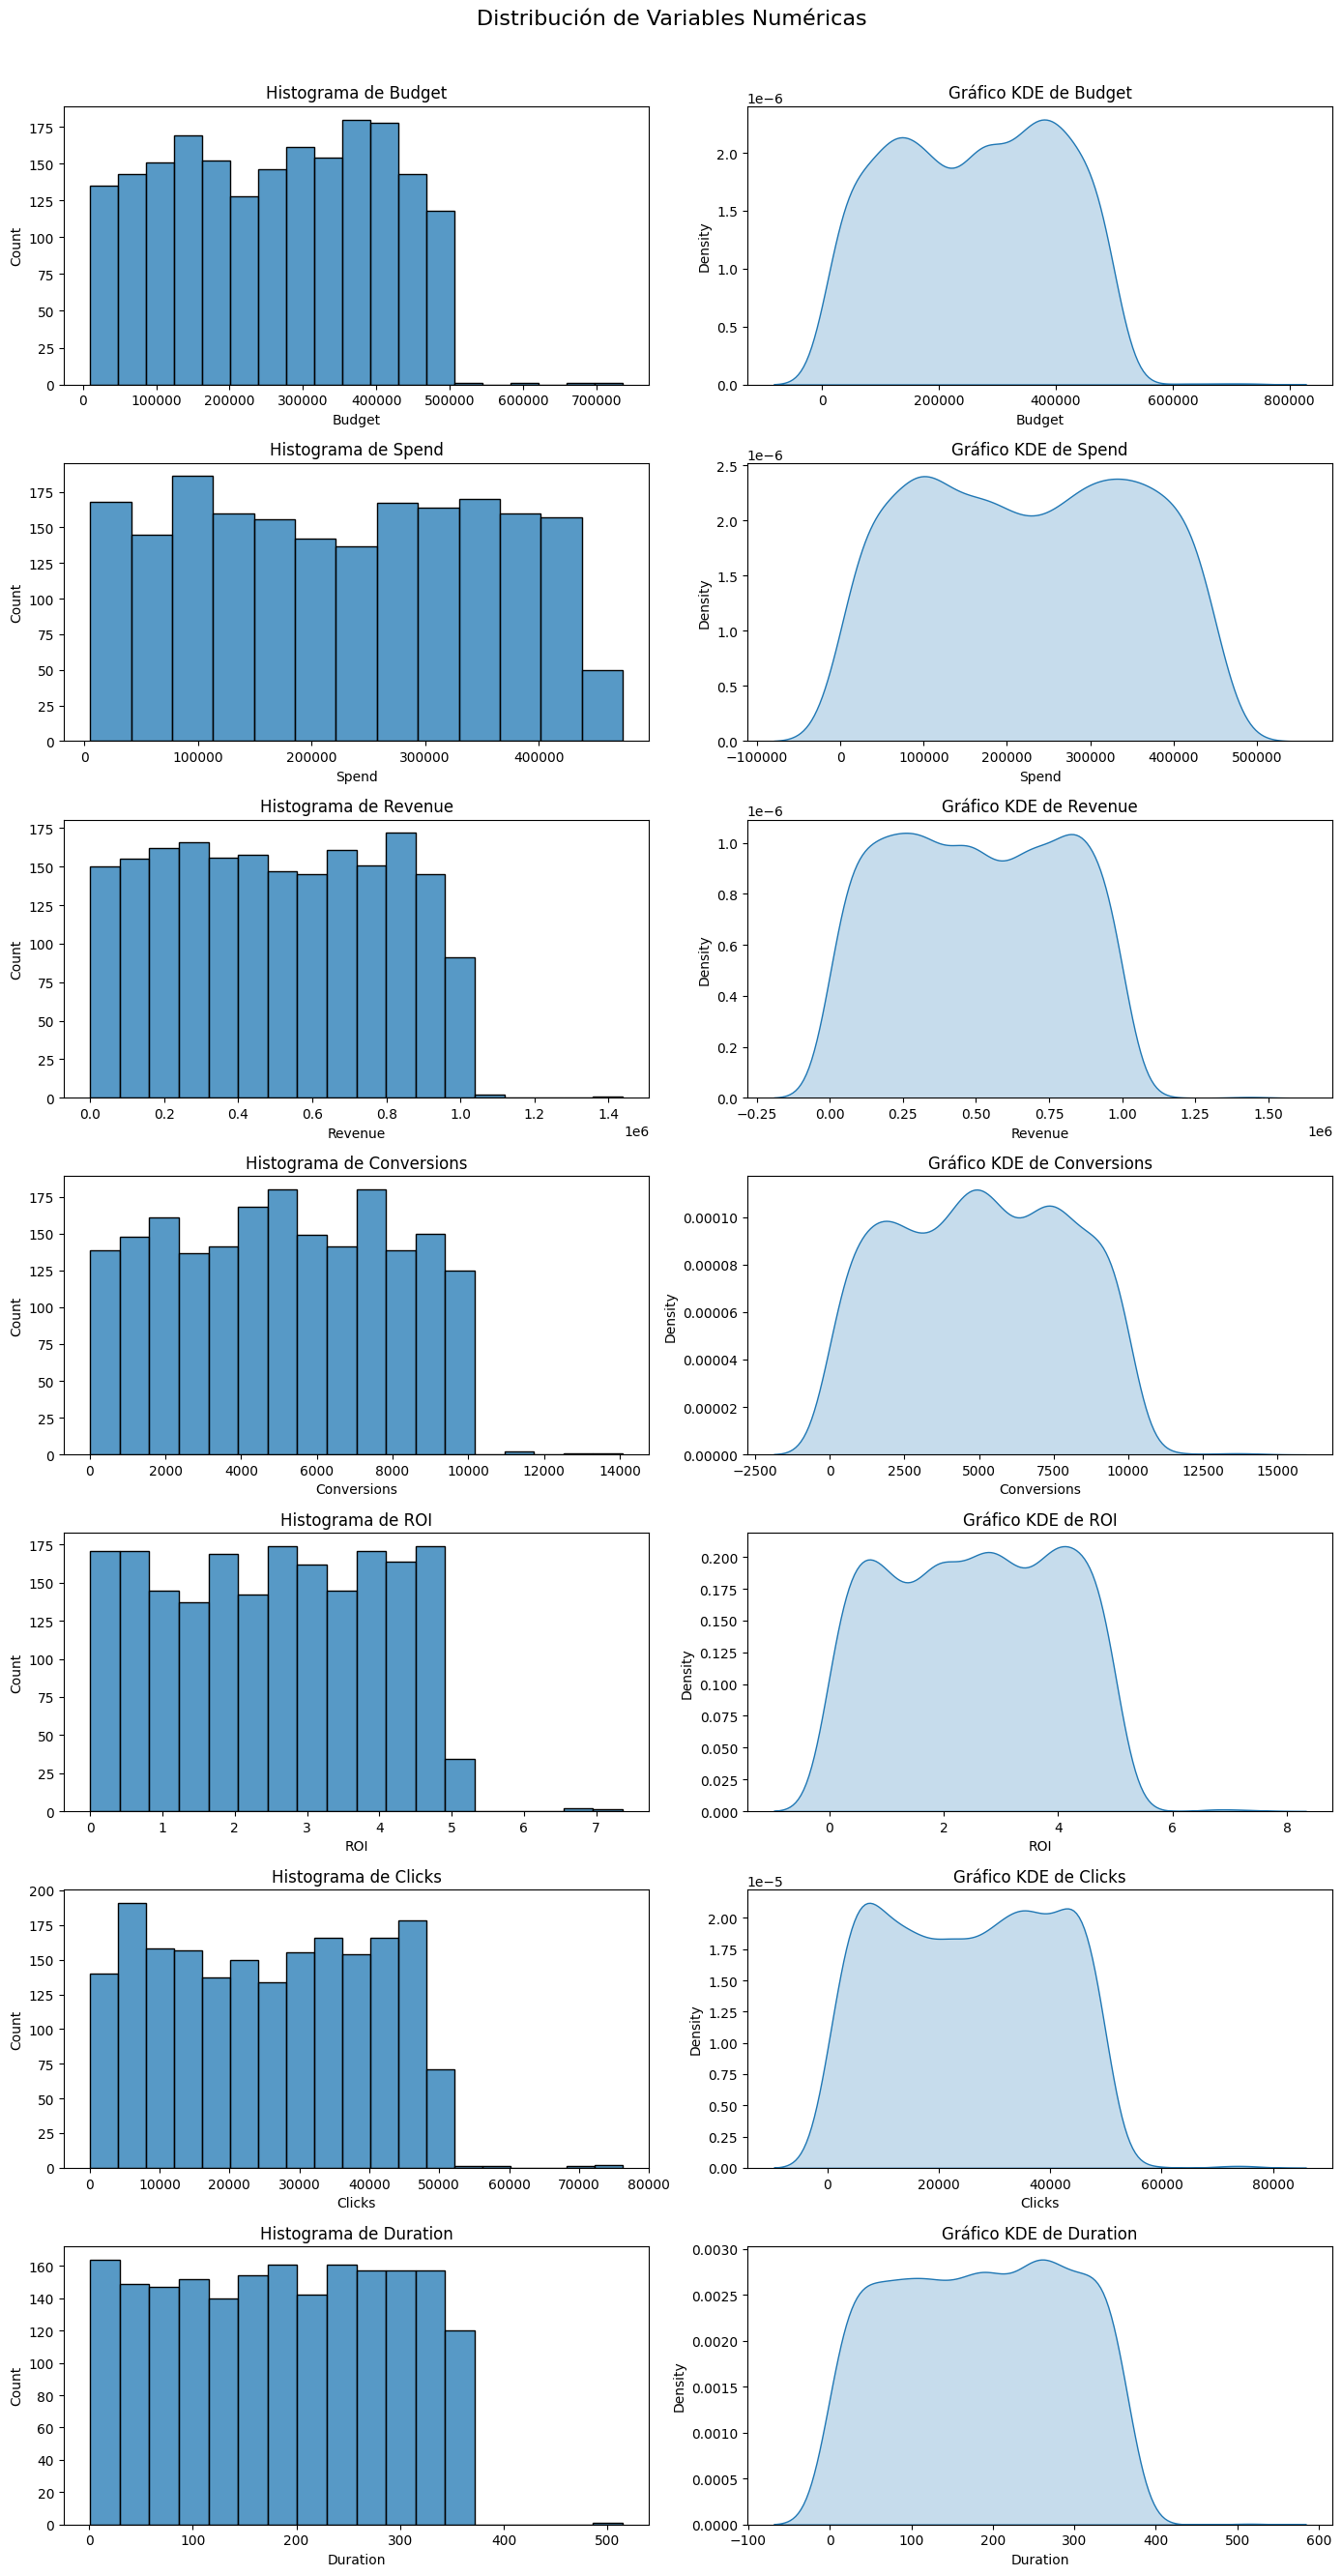

In [ ]:

# Variables numéricas
numerical_columns = ['Budget','Spend','Revenue','Conversions', 'ROI','Clicks','Duration']

# Crear histogramas y gráficos KDE para variables numéricas
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(14, len(numerical_columns) * 4))
fig.suptitle("Distribución de Variables Numéricas", fontsize=16)

for i, column in enumerate(numerical_columns):
    # Histograma
    sns.histplot(df_filtrado[column].dropna(), kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {column}')

    # Gráfico KDE
    sns.kdeplot(df_filtrado[column].dropna(), ax=axes[i, 1], fill=True)
    axes[i, 1].set_title(f'Gráfico KDE de {column}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


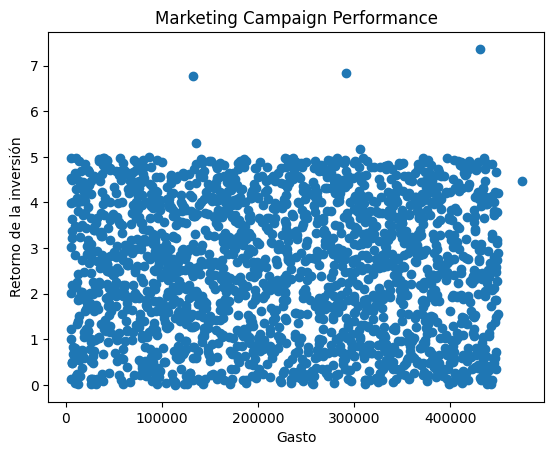

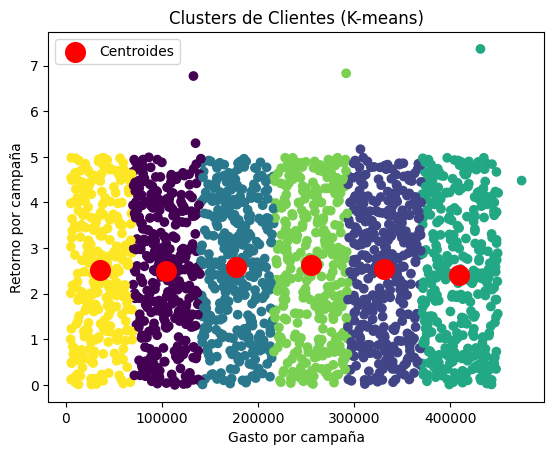

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Visualizar los datos sin clusters
plt.scatter(df_filtrado['Spend'], df_filtrado['ROI'])
plt.title('Marketing Campaign Performance')
plt.xlabel('Gasto')
plt.ylabel('Retorno de la inversión')
plt.show()

# Aplicar K-means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)
df_filtrado['Cluster'] = kmeans.fit_predict(df_filtrado[['Spend', 'ROI']])

# Visualizar los clusters
plt.scatter(df_filtrado['Spend'], df_filtrado['ROI'], c=df_filtrado['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.title('Clusters de Clientes (K-means)')
plt.xlabel('Gasto por campaña')
plt.ylabel('Retorno por campaña')
plt.legend()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_15244\3051775046.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Revenue', data=df_filtrado, palette='Blues')


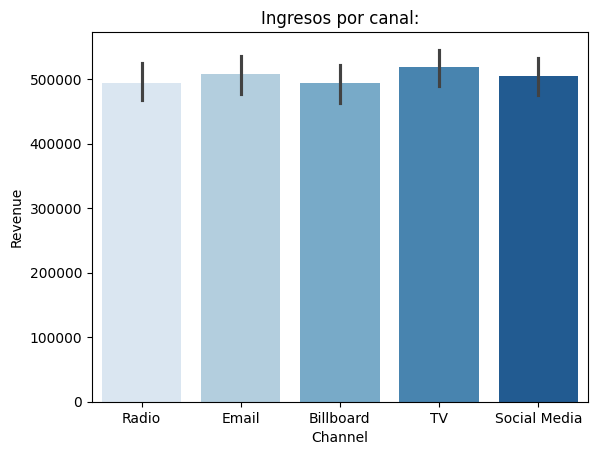

In [ ]:
sns.barplot(x='Channel', y='Revenue', data=df_filtrado, palette='Blues')
plt.xlabel('Channel')
plt.ylabel('Revenue')
plt.title('Ingresos por canal:')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_15244\3435456146.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Revenue', data=df_filtrado, palette='Blues')


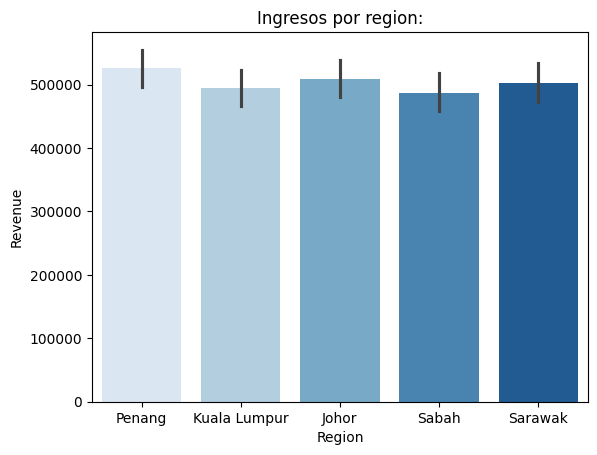

In [ ]:
sns.barplot(x='Region', y='Revenue', data=df_filtrado, palette='Blues')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.title('Ingresos por region:')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_15244\381898834.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='ROI', data=df_filtrado, palette='Blues')


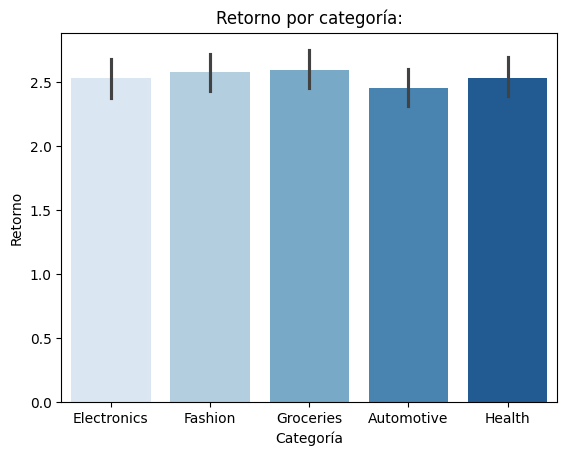

In [ ]:
sns.barplot(x='Product_Category', y='ROI', data=df_filtrado, palette='Blues')
plt.xlabel('Categoría')
plt.ylabel('Retorno')
plt.title('Retorno por categoría:')
plt.show()

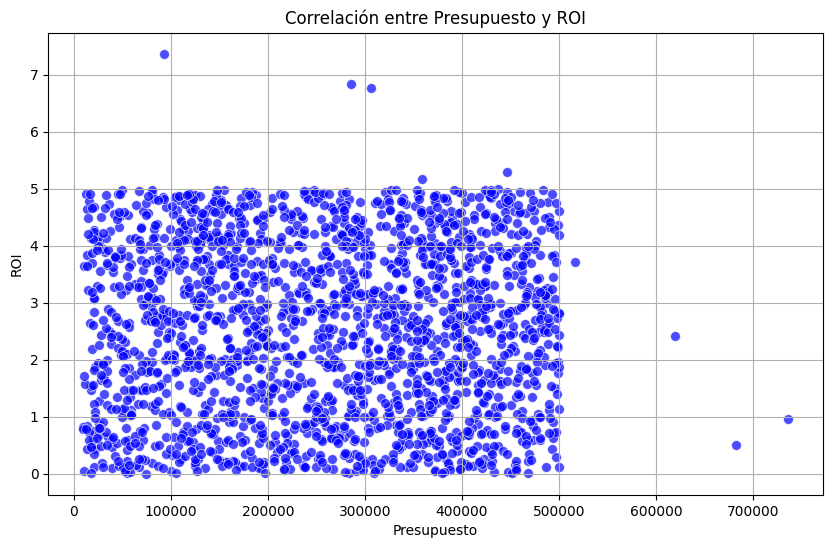

In [ ]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x="Budget", y="ROI", color="b", s=50, alpha=0.7)

# Agregar etiquetas y título
plt.xlabel("Presupuesto")
plt.ylabel("ROI")
plt.title("Correlación entre Presupuesto y ROI")
plt.grid(True)
plt.show()

### 5.Interpretación y conclusiones
##### ¿Que canales de marketing son más efectivos?
Según hemos visto en uno de los gráficos anteriores los canales más efectivos son Billboard, RRSS y E-mail.
##### ¿Que regiones generan más ingresos?
Los ingresos más altos están en Penang, Johor y Sarawat
##### ¿Existe correlacion entre el presupuesto y el ROI?
Si mis calculos son correctos sí porque en la gráfica se ha demostrado como cuanto más inviertes más rentable es, sobre todo si lo hacemos por el canal y el en país adecuado. 

Mi recomendación es en que las campañas más exitosas son de productos tecnológicos y comida. Además ha quedado reflejado como uno de los canales más potentes de publicidad son los Billboard, las RRSS y el E-mail, la radio y TV también fueron muy efectivas.